# 뉴스 기사 분류: 다중 분류 문제

## 로이터 데이터셋
1986년 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합<br>
텍스트 분류를 위해 널리 사용되는 간단한 데이터 셋<br>
46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많음<br>
각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있음<br>

## 1. 로이터 데이터셋 로드하기

In [2]:
import numpy as np
# save np.load
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

### 로이터 데이터셋을 텍스트로 디코딩하기

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

557056/550378 [==============================] - 17s 30us/step


In [7]:
train_labels[10]

3

## 2. 데이터 준비

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 3. 모델 구성

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [18]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

## 4. 훈련 검증

### 검증 세트 준비하기

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### 모델 훈련하기

In [22]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 408us/step - loss: 1.1045 - acc: 0.7566 - val_loss: 1.1424 - val_acc: 0.7530
Epoch 2/20
7982/7982 [==============================] - 3s 407us/step - loss: 0.8642 - acc: 0.8127 - val_loss: 1.0374 - val_acc: 0.7830
Epoch 3/20
7982/7982 [==============================] - 3s 411us/step - loss: 0.6872 - acc: 0.8537 - val_loss: 0.9749 - val_acc: 0.7920
Epoch 4/20
7982/7982 [==============================] - 3s 424us/step - loss: 0.5548 - acc: 0.8860 - val_loss: 0.9206 - val_acc: 0.8150
Epoch 5/20
7982/7982 [==============================] - 4s 520us/step - loss: 0.4408 - acc: 0.9090 - val_loss: 0.8923 - val_acc: 0.8160
Epoch 6/20
7982/7982 [==============================] - 3s 430us/step - loss: 0.3608 - acc: 0.9226 - val_loss: 0.8929 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 4s 470us/step - loss: 0.2989 - acc: 0.9339 - val_loss: 0.9292 - val_acc: 0.7960


### 훈련과 검증 손실 그리기

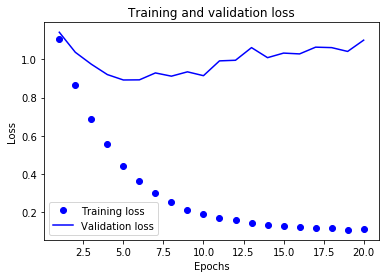

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 훈련과 검증 정확도 그리기

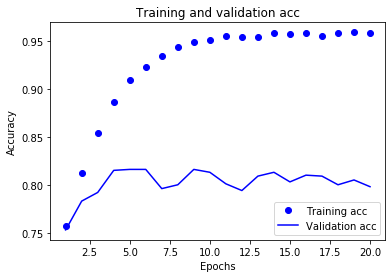

In [25]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['acc']
val_loss = history_dict['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 5. 모델 평가

In [26]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 1s 560us/step


In [27]:
results

[1.2629010327034302, 0.7796081923419412]

77.6%의 정확도를 가짐